# Introduction: 

Undoubtedly one of the most popular music streaming platforms today, Spotify, is highly driven by data. Data scientists utilize machine learning for recommender systems which are one of the most popular, and eerily accurate features of the platform, for personally-curated playlists. More thought-out, and even novel features, are constantly sought out to keep users interacting with the platform. 

The goal of this project is to analyze the annual (average) trends of features of a large set of (+160k) Spotify songs. We will attempt to determine what values of each feature will likely be in the future- a data-driven, numerical representation of what music might sound like 5 years into the future. A playlist of songs that can then be attributed most closely to those future feature values can be created and titled "Tracks Ahead of Their Time”.



# Obtaining and Importing our data
Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from functools import reduce

We have a few datasets that we downloaded from Kaggle, however we will need only a few of them for our whole project here. We want to model time series for each feature over time, so we will need yearly data for that.

Afterwards, we will want to search for future feature values in a set that has the individual tracks and respective feature values, which would be the total data.

Importing datasets obtained from Kaggle, which are actually obtained from the Spotify API:

In [2]:
genre_data = pd.read_csv('Datasets/data_by_genres.csv')
year_data = pd.read_csv('Datasets/data_by_year.csv')
artist_data = pd.read_csv('Datasets/data_by_artist.csv.zip')
total_data = pd.read_csv('Datasets/data.csv.zip')
total_data_w_genres = pd.read_csv('Datasets/data_w_genres.csv.zip')

Note: year_data has the mean value for each numeric column for each year.

In [3]:
year_data.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1921,0.895823,0.425661,229911.914062,0.236784,0.322330,0.215814,-17.095437,0.077258,100.397758,0.425495,0.351562,7,1
1,1922,0.939236,0.480000,167904.541667,0.237026,0.440470,0.238647,-19.179958,0.115419,101.376139,0.534056,0.138889,10,1
2,1923,0.976329,0.568462,178356.301775,0.246936,0.401932,0.236656,-14.373882,0.098619,112.456598,0.624788,5.727811,0,1
3,1924,0.935575,0.548654,188461.649789,0.347033,0.583955,0.237875,-14.202304,0.090210,120.653359,0.668574,0.603376,10,1
4,1925,0.965422,0.571890,184130.699620,0.264373,0.408893,0.243094,-14.516707,0.115457,115.671715,0.616430,2.707224,5,1


In [4]:
year_data.info()
year_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
year                100 non-null int64
acousticness        100 non-null float64
danceability        100 non-null float64
duration_ms         100 non-null float64
energy              100 non-null float64
instrumentalness    100 non-null float64
liveness            100 non-null float64
loudness            100 non-null float64
speechiness         100 non-null float64
tempo               100 non-null float64
valence             100 non-null float64
popularity          100 non-null float64
key                 100 non-null int64
mode                100 non-null int64
dtypes: float64(11), int64(3)
memory usage: 11.1 KB


year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
dtype: int64

In [5]:
year_data.columns

Index(['year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode'],
      dtype='object')

In [6]:
for col in year_data.columns:
    print(year_data[col].value_counts())

2020    1
1957    1
1947    1
1948    1
1949    1
       ..
1990    1
1991    1
1992    1
1993    1
1921    1
Name: year, Length: 100, dtype: int64
0.701387    1
0.866723    1
0.241969    1
0.443722    1
0.264210    1
           ..
0.283249    1
0.306603    1
0.303143    1
0.924217    1
0.851036    1
Name: acousticness, Length: 100, dtype: int64
0.537294    1
0.673077    1
0.544783    1
0.577811    1
0.436234    1
           ..
0.556888    1
0.481585    1
0.510382    1
0.520847    1
0.557838    1
Name: danceability, Length: 100, dtype: int64
200919.119000    1
252524.908500    1
241185.707000    1
247493.179454    1
217330.871500    1
                ..
211600.632500    1
216623.042000    1
246396.506000    1
252177.566500    1
259626.214500    1
Name: duration_ms, Length: 100, dtype: int64
0.296748    1
0.373388    1
0.657830    1
0.586739    1
0.306299    1
           ..
0.244698    1
0.570142    1
0.287361    1
0.590591    1
0.614843    1
Name: energy, Length: 100, dtype: int64
0.32

In [7]:
total_data.info()
total_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
acousticness        169909 non-null float64
artists             169909 non-null object
danceability        169909 non-null float64
duration_ms         169909 non-null int64
energy              169909 non-null float64
explicit            169909 non-null int64
id                  169909 non-null object
instrumentalness    169909 non-null float64
key                 169909 non-null int64
liveness            169909 non-null float64
loudness            169909 non-null float64
mode                169909 non-null int64
name                169909 non-null object
popularity          169909 non-null int64
release_date        169909 non-null object
speechiness         169909 non-null float64
tempo               169909 non-null float64
valence             169909 non-null float64
year                169909 non-null int64
dtypes: float64(9), int64(6), object(4)
memory usage: 24.6+ MB


acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

We have one column for 'release_date', which seems straight-forward, yet there is another columns for 'year' let's compare the two.

In [8]:
total_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


The two are the same, with year just being the shorter date. As we only have 100 values in our 'data_by_year' dataset, we might want to use 'release_date' for down-sampling later on. This would give us more data to work with when we do our time-series modeling.

In [9]:
for col in total_data:
    print(total_data[col].value_counts())

0.995000    3036
0.994000    2290
0.993000    1741
0.992000    1498
0.991000    1261
            ... 
0.000846       1
0.000018       1
0.000810       1
0.000036       1
0.000075       1
Name: acousticness, Length: 4714, dtype: int64
['Эрнест Хемингуэй']                                                                                                                                                                                  1215
['Francisco Canaro']                                                                                                                                                                                   938
['Эрих Мария Ремарк']                                                                                                                                                                                  781
['Ignacio Corsini']                                                                                                                                          

Our data sets look particularly clean. No missing/null values. 

Normally this does not happen, however since these datasets are all we need and are readily available, it is beneficial to save time and use this data instead of accessing the API for Spotify.

We can also use our exploratory analysis to determine if there is some cleaning jobs we might have missed.


# EDA (& Preprocessing Along the Way)
Let's begin to explore the big dataset (total_data) and try to get a better understanding of how these feature values are changing over time (years). I will mostly be using boxplots to understand the distribution of songs for each year.
Starting with the 5-point statistics for the data:

In [10]:
total_data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


Looking at the min, median (50%), and max values for each column, we can see that many of these features are normalized. This is done to help with modeling, by bringing the values to a common scale, without messing up the range of the values.

In [11]:
#trying to iterate over columns by type and appending to list

# normalized_features = []
# for col in total_data:
#     if type(col) != str:
#         if total_data[col].max() <= 1.0:
#             print(col)
            

### 'total_data' correlation heatmap

Let's take a look at a correlation plot for our total_data. This will help us understand how some values correlate with others using the entirety of the data.

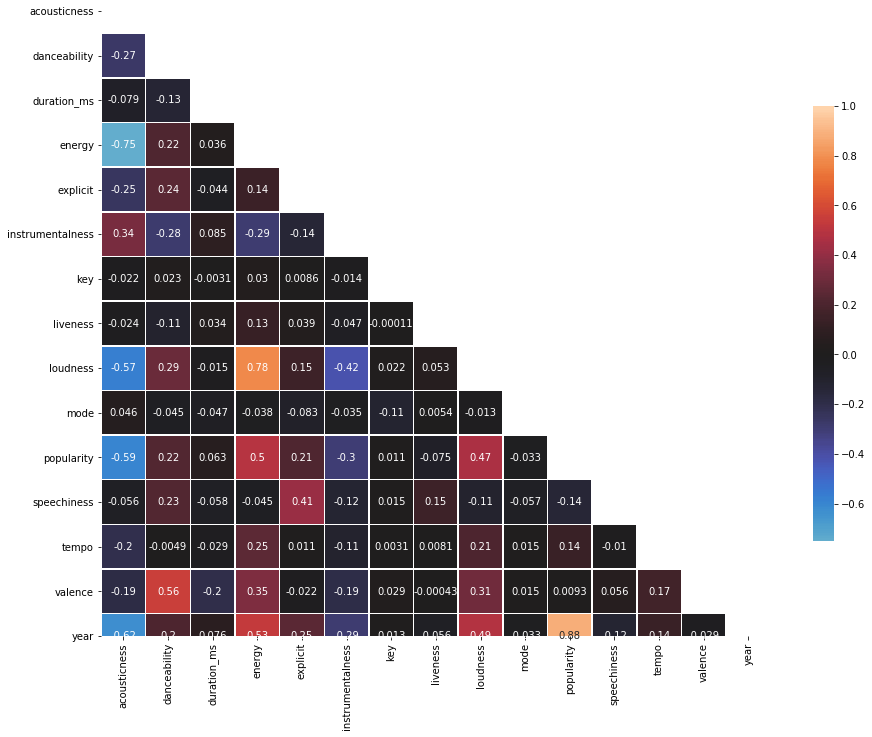

In [3]:
corr = total_data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, vmax=1, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .4})

plt.savefig('Images/correlation.png');

Highly correlated values stand out in the brightest colors. We can see there is a relatively high positive correlation between loudness and energy. A high negative correlation between loudness and acousticness. High positive correlation between popularity and year.

### Countplot for tracks per year
Let's see how many tracks there are in this total_data set per year.

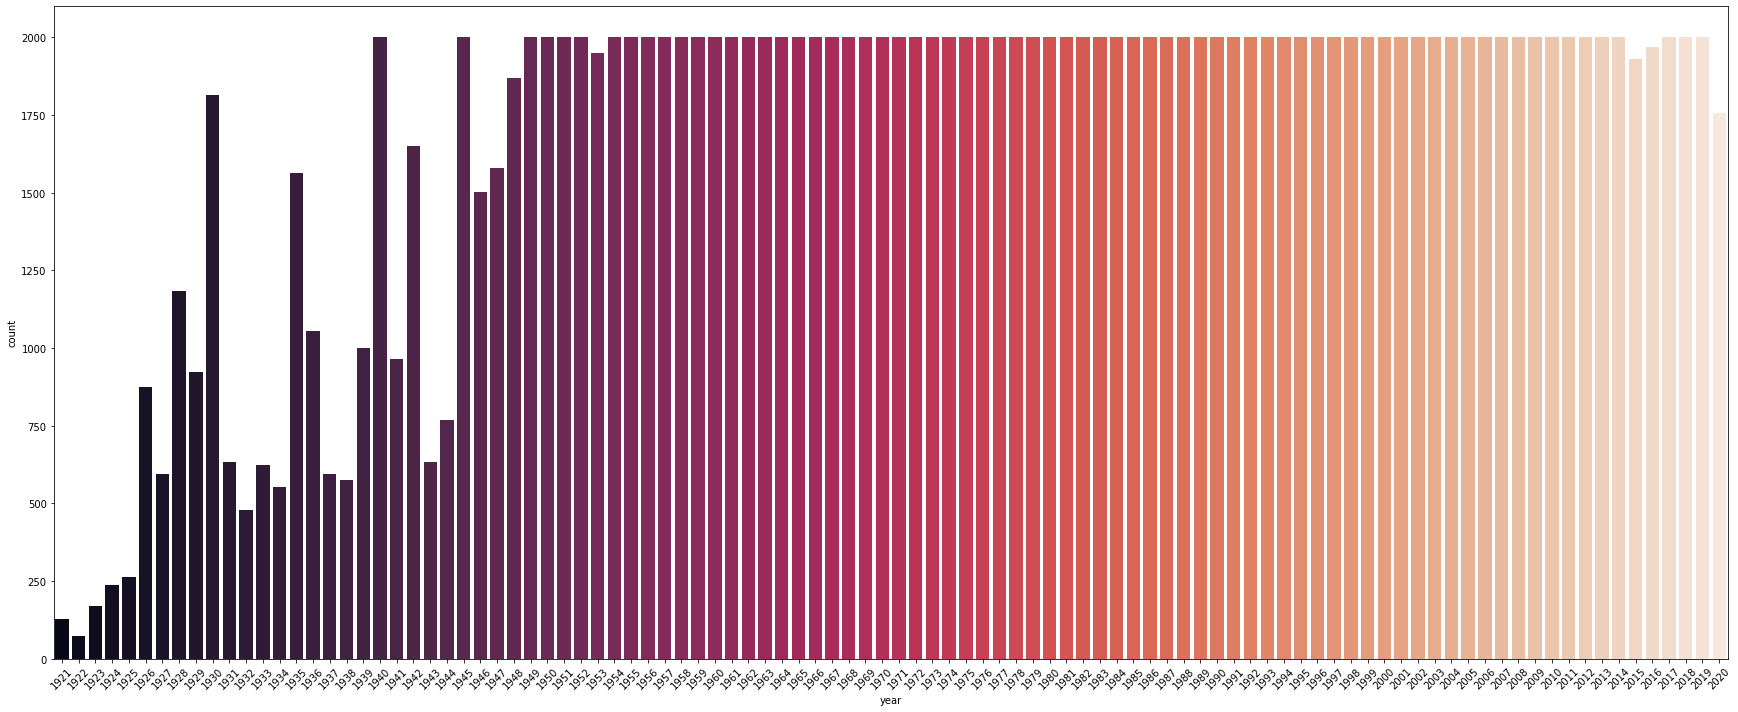

<Figure size 432x288 with 0 Axes>

In [13]:
plt.figure(figsize=(30,12))
sns.countplot(x=total_data.year, palette="rocket", color="k")
plt.xticks(rotation=45)
plt.show()
plt.savefig('Images/yearly_countplot.png');

So it looks like whoever created this dataset, set a limit on the number of tracks per year at 2,000. There are not a lot of songs for the earliest years (before 1950), with a very small amount of songs in the 20s. 

Really depending on how the data was compiled from the Spotify API, I wonder if these counts are somehow representative of the entire amount of music released year per year.

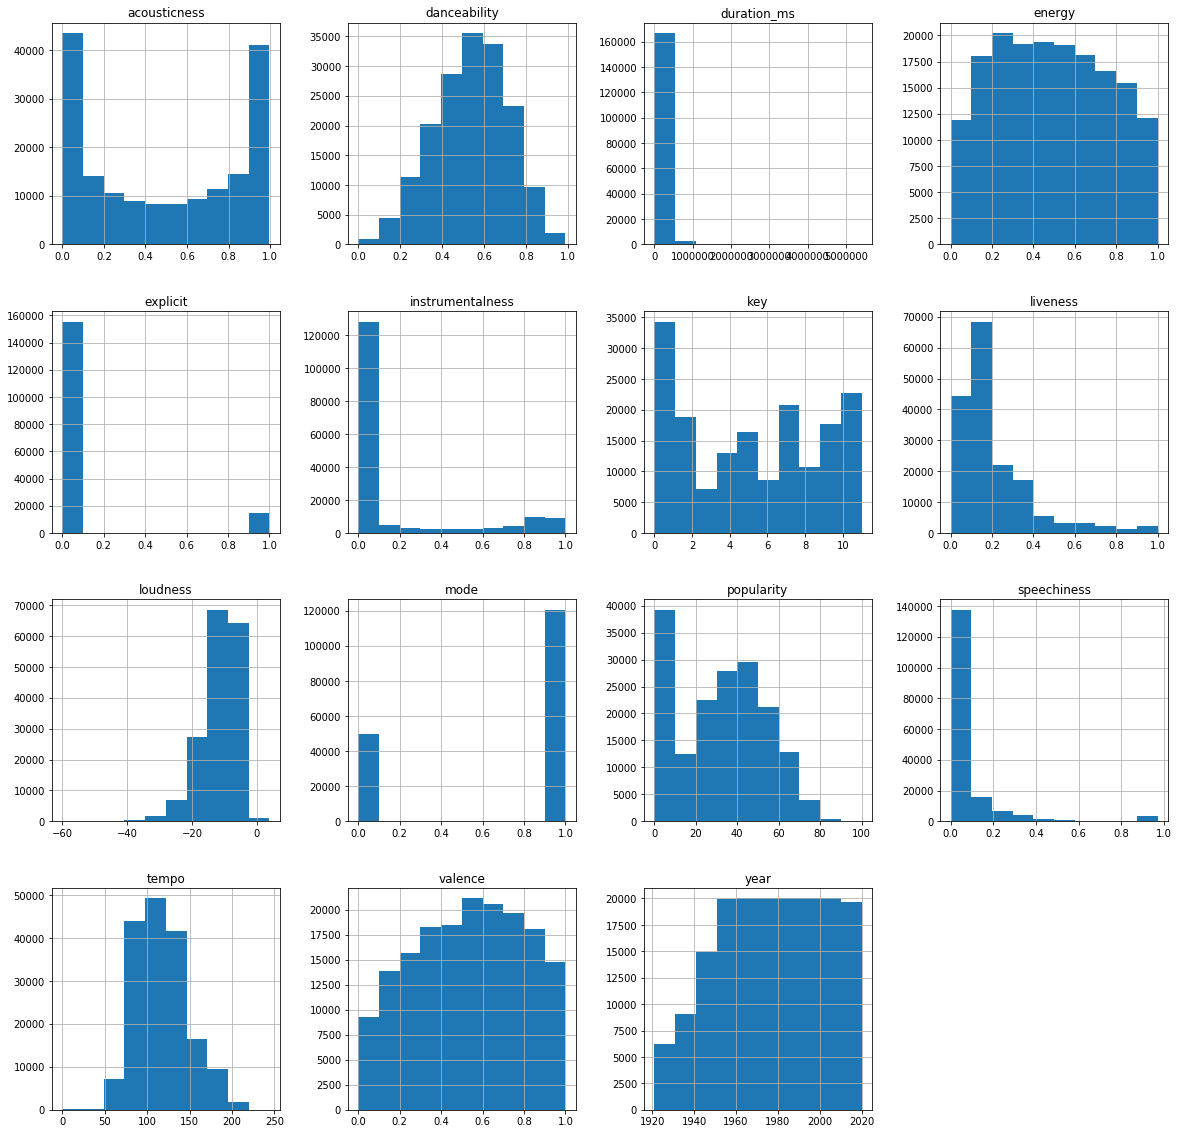

In [14]:
total_data.hist(figsize=(20, 20))
plt.show()

### Scatterplots for each column

Let's define a scatter plot function with matplotlib that will make a scatterplot for each column in the dataset for a quick visualization over time:

In [15]:
def quick_scatter(df):
    '''Creates a scatterplot for each column in the dataframe, against the year column.
    Input: df (dataframe)'''
    for col in df.columns: 
        plt.scatter(df.year, df[col], label=col)
        plt.legend()
        plt.xlabel(col)
        plt.xlabel('year')
        plt.title(col)
        plt.show()        

Starting with our yearly mean data, plotting the features over the years:

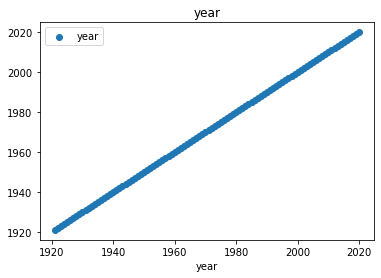

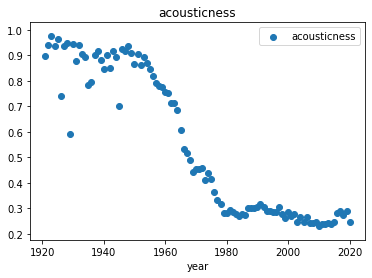

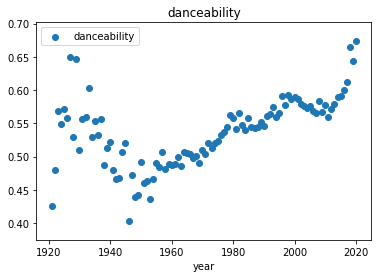

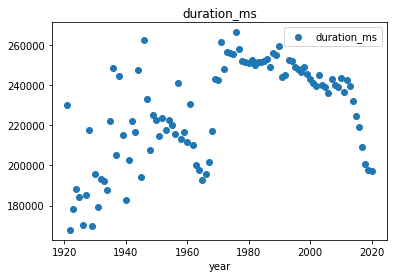

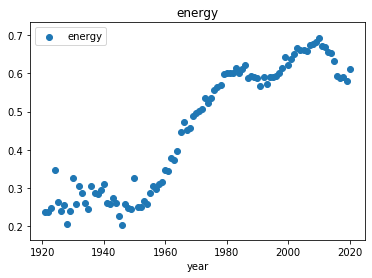

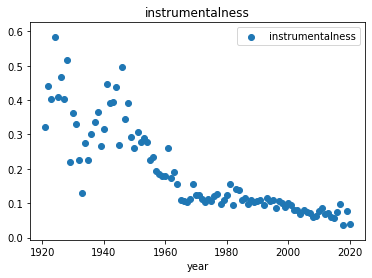

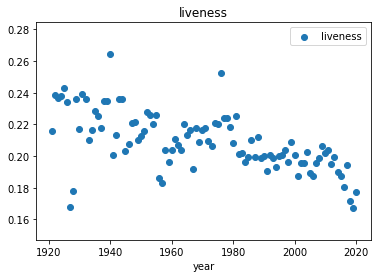

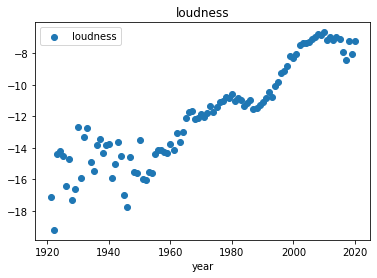

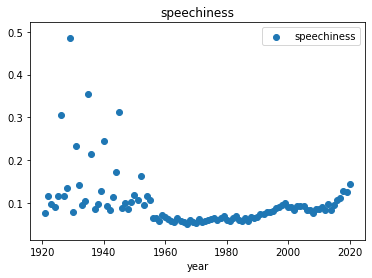

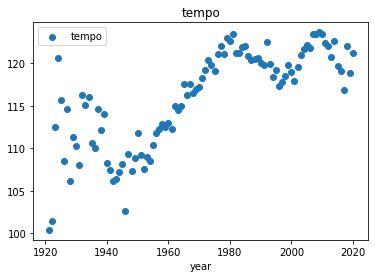

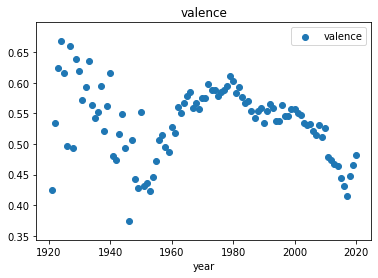

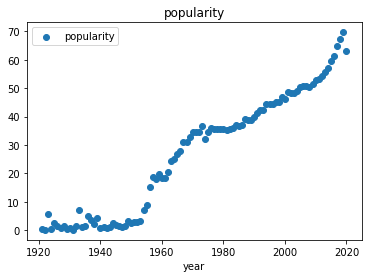

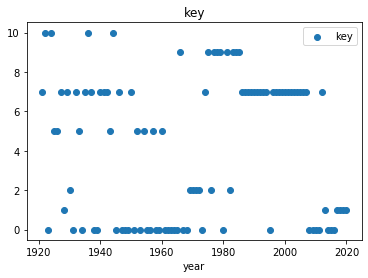

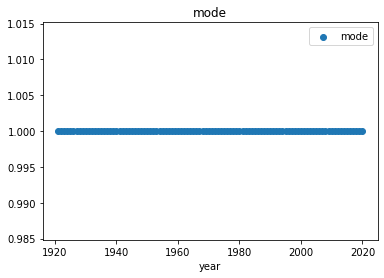

In [16]:
quick_scatter(year_data)

There are some very interesting trends here. In general, the median feature values of music from years 1920 to (about) 1960 were varying heavily, year-by-year. After around 1960, the feature values by year start to follow more visible trends. 

For example: 

'danceability' is all over the chart for the earliest years and around 1960, condenses around 0.5 and starts to rise more steadily for the rest of time. 

'duration_ms' is quite sporadic over the years until about the 80's, where tracks are generally longer and then start to get shorter in duration most recently.

'energy' picks up over time and peaks around 2010.


As these values are all consolidated for the data_by_year dataset, there is no way to see the distribution that made these values. Let's use the big dataset, which we labeled 'total_data' to plot the distribution of some key features over time.

In [17]:
total_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


'total_data' boxplot for 'danceability' over the years:

## 'acousticness'

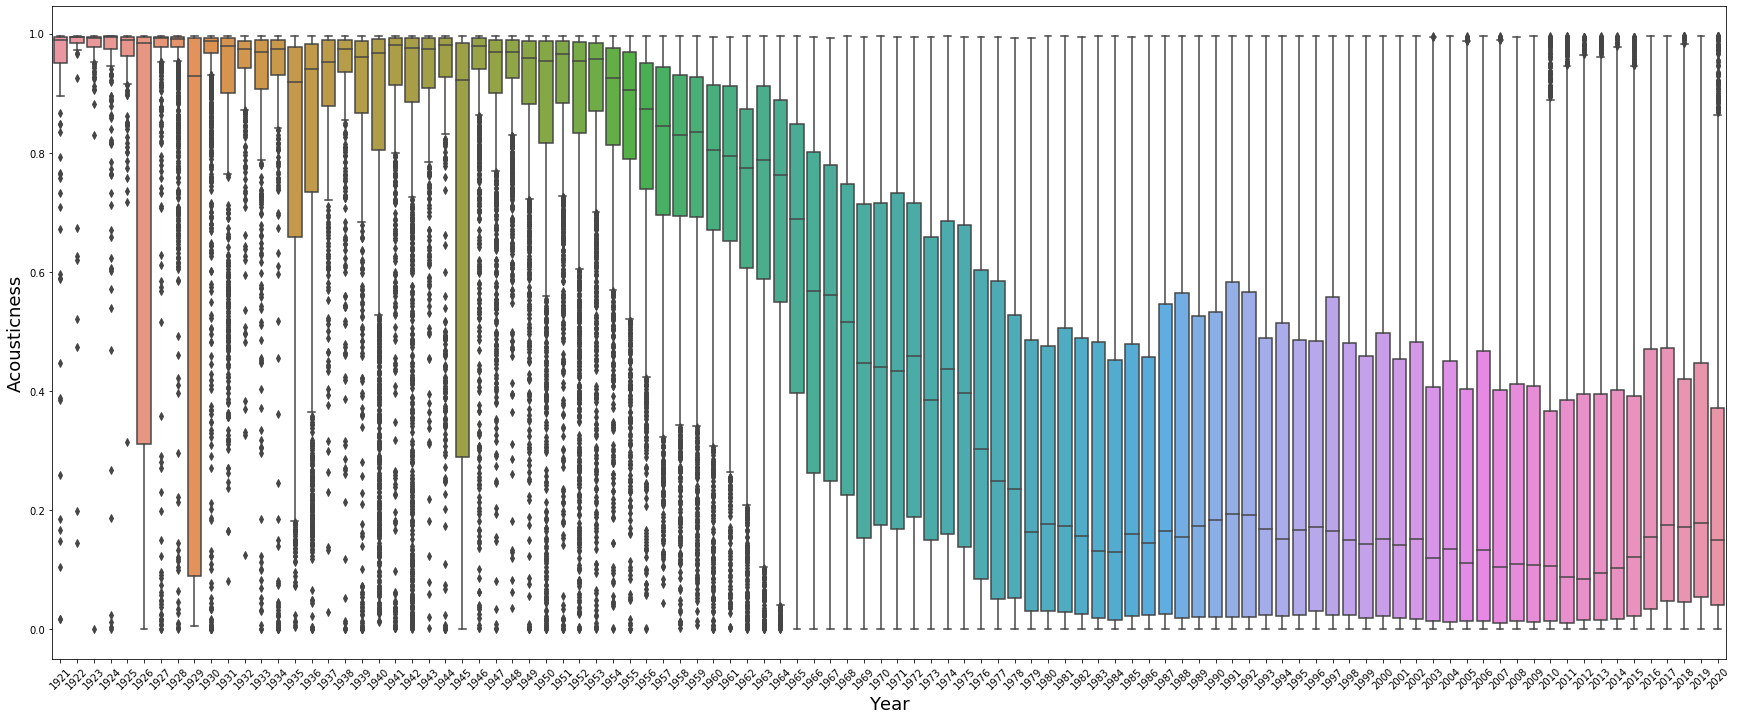

In [18]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x="year", y="acousticness", data=total_data)
plt.xlabel("Year", size=18)
plt.ylabel("Acousticness", size=18)

plt.savefig('Images/acousticness_boxplot.png');

Wow. There is a sharp distinction for  Acousticness. Highly acoustic music in the early 20th century. Technological advancements in amplifiers, production equipment is likely the reason for most recent music to sound less acoustic.

This data's distribution is telling me that the mean values for acousticness per year might not be a great respresentation of the data as they are subject to skew by the outliers. We might need to create a new yearly dataframe with median values instead. The median values will more accurately represent the majority of the data.

Let's compare the mean (year_data) and median values (total_data) side-by-side:
### Yearly Mean vs Yearly Median (Acousticness)

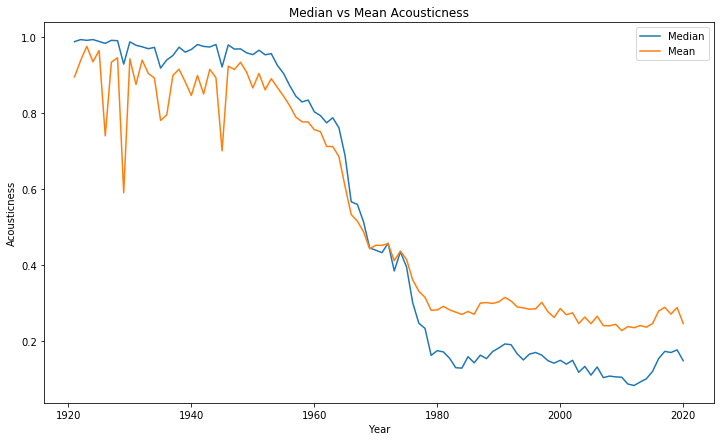

In [19]:
yrly_acoustic_median = total_data.groupby('year', as_index=False)['acousticness'].median()
yrly_acoustic_mean = total_data.groupby('year', as_index=False)['acousticness'].mean()

plt.figure(figsize=(12,7))
plt.plot('year','acousticness', label = "Median", data=yrly_acoustic_median)
plt.plot('year','acousticness', label = "Mean", data=year_data)
plt.xlabel('Year')
plt.ylabel('Acousticness')
# Set a title of the current axes.
plt.title('Median vs Mean Acousticness')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show();

We can see that outliers in some years have cause major spikes in the data, despite the distribution of total values for those years. Again, this confirms that it makes more sense to use median values to represent the average yearly values for our data, for modeling.

Let's only save the median values to a new df and .csv for modeling after we have finished our EDA because there might be some cleaning to do.

In [20]:
# yrly_acoustic_median.to_csv(r'Datasets/yrly_acoustic_median.csv', index = False);

## 'danceability'

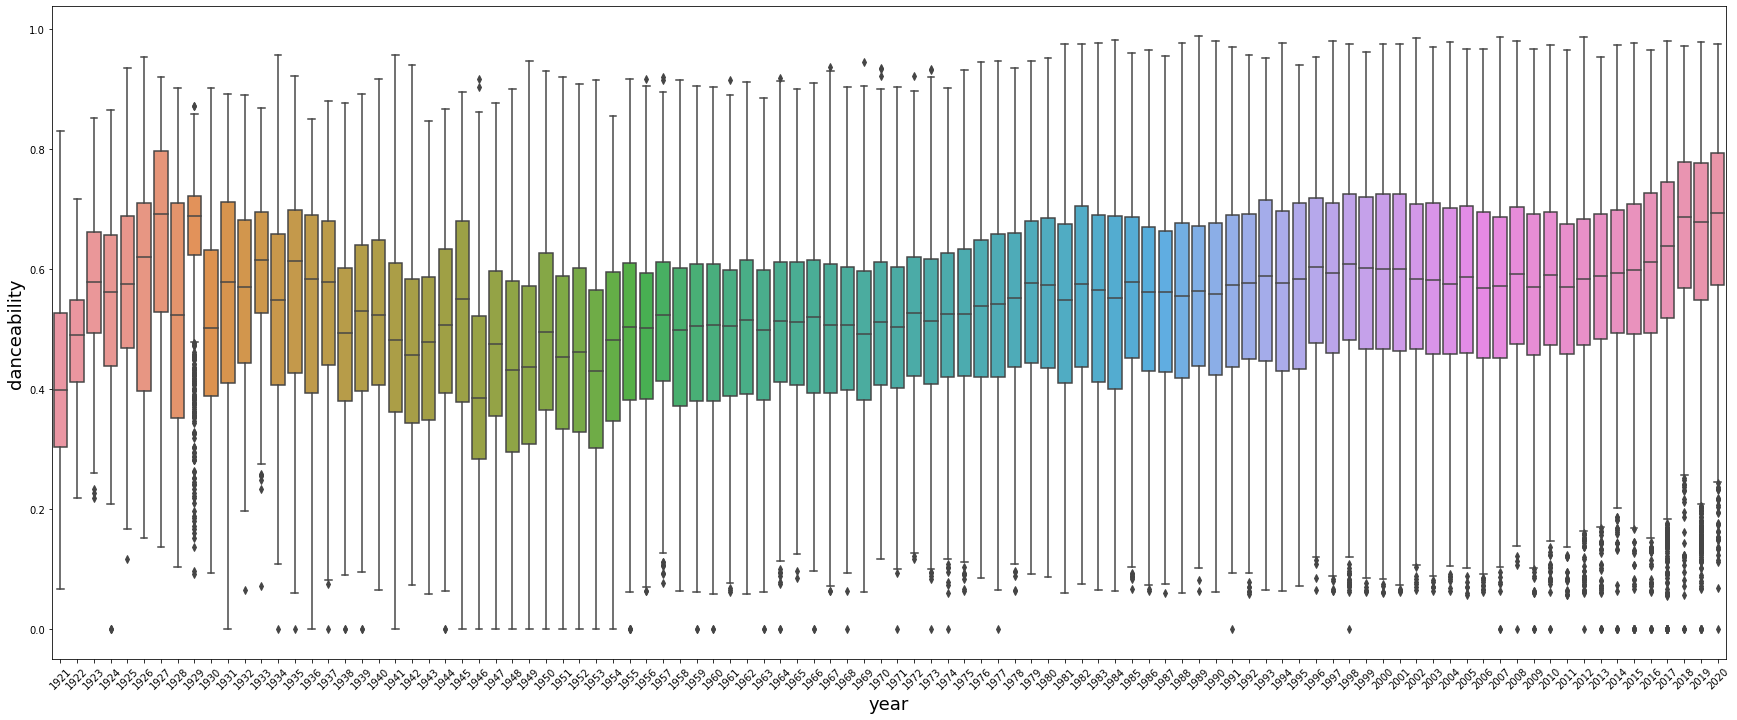

In [21]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
plt.xlabel("Year", size=18)
plt.ylabel("Danceability", size=18)
sns.boxplot(x="year", y="danceability", data=total_data);

We can now see that the range of values spans nearly the entire range throughout the years, however the median values are what we are seeing rise steadily after the 50's. 

Another observation to note is that while the range at a glance seems to be quite wide throughout the dataset, there are some noticeable differences when we increase the height of our boxplot. The danceability range starts of smaller in the 20's, widens around the 40's, and by the most recent years, the inter-quartile range cuts off at about 0.3 (meaning only the outliers have such low 'danceability'). 

Perhaps, the recent rise in danceability could be attributed to the further explosion of dance music in the past 15 years and maybe even it's influence on the other popular genres like Pop.

I am very curious as to what our data's most danceable track:

In [22]:
total_data[total_data.danceability == total_data.danceability.max()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
84909,0.0755,['Tone-Loc'],0.988,248160,0.633,0,5YIF6HSOtHN9HdcE5IPzMe,0.000002,5,0.0668,-15.012,0,Funky Cold Medina,57,1989-01-01,0.0888,117.493,0.929,1989


## 'energy'
'Energy' "...represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. "

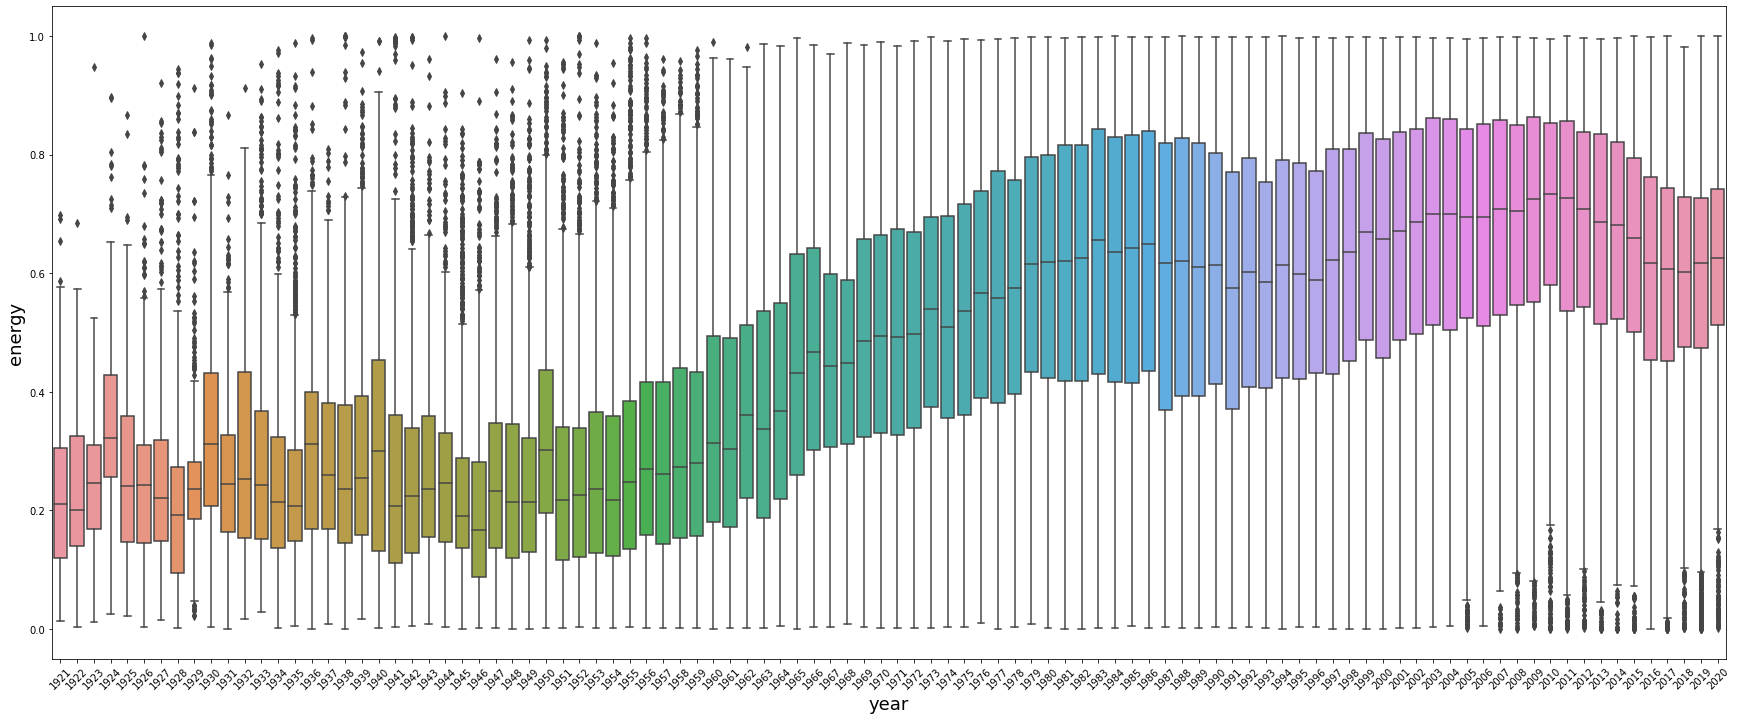

In [23]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
plt.xlabel("Year", size=18)
plt.ylabel("Energy", size=18)
sns.boxplot(x="year", y="energy", data=total_data);

Generally energy has been picking up steadily, with a recent dip from 2009-2018.

## "loudness"
Loudness is a topic of some controversy by many audiophiles in the music industry. Self-explanatory, it refers to how loud the songs are. In most recent times, audio engineering has made leaps and bounds, allowing very clean compression techniques (and mixing and mastering in general) which enable audio engineers to "squash" audio waveforms, thereby reducing dynamic range and pushing up the overall volume of the track. Some more traditional engineers prefer to preserve the dynamic range, while modern pop engineers sacrifice dynamic range for loudness.

Loudness here is measured in -db (decibels). Let's look at the distribution of "loudness" over the years:

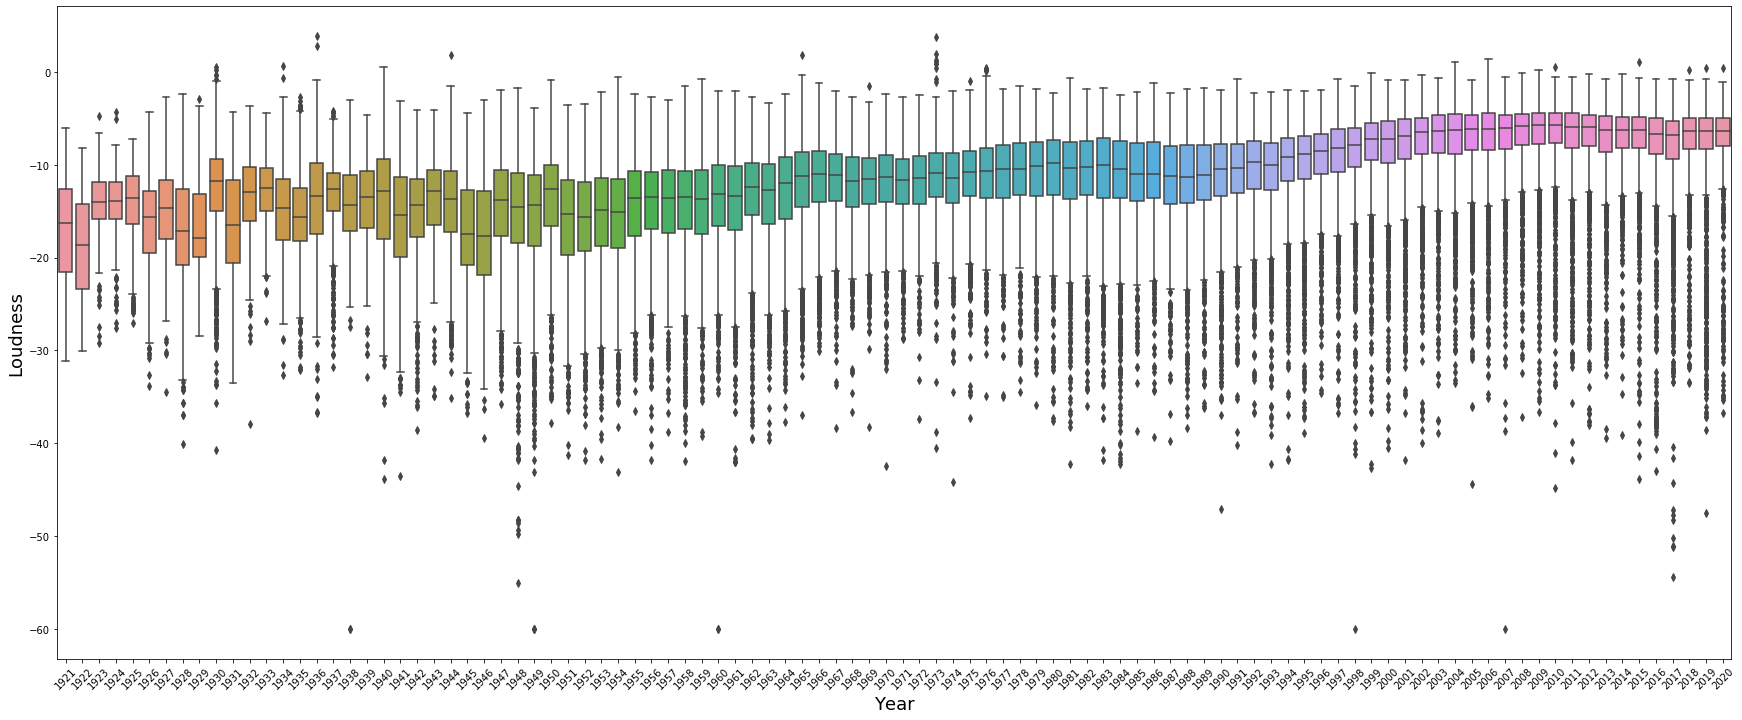

In [24]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x="year", y="loudness", data=total_data)
plt.xlabel("Year", size=18)
plt.ylabel("Loudness", size=18);

The inter-quartile range of loudness condenses over time. The median loudness also increase over time. 

Some very low-level outliers are very quiet. Let's see what song has the minimum loudness:

In [25]:
total_data[total_data.loudness == total_data.loudness.min()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
41981,0.0,['Connie Francis'],0.0,179466,0.0,0,0zr7DJGTPUfAUmjM7crmt2,0.0,0,0.0,-60.0,0,Hava Nagilah,12,1960-01-01,0.0,0.0,0.0,1960
48566,0.0,['Sarah Vaughan'],0.0,6467,0.0,0,3lRVIn6D6EUbvkOgPZAU1H,0.0,0,0.0,-60.0,0,Pause Track,0,1949,0.0,0.0,0.0,1949
61074,0.0,['Robert Earl Keen'],0.0,60372,0.0,0,0o12mLSQuXFgsh4e2Kc4e5,0.0,0,0.0,-60.0,0,Silent Track,35,1998-10-27,0.0,0.0,0.0,1998
61972,0.0,['Atlas Fret'],0.0,132827,0.0,0,7cctPQS83y620UQtMd1ilL,0.0,0,0.0,-60.0,0,(silent track),40,2007-01-01,0.0,0.0,0.0,2007
64593,0.0,['Connie Francis'],0.0,253719,0.0,0,5KAJv7Bceihn1frqElloIb,0.0,0,0.0,-60.0,0,My Yiddishe Momme,12,1960-01-01,0.0,0.0,0.0,1960
99092,0.0,['Benny Goodman'],0.0,5991,0.0,0,3IcXTeq9O2dpsSXsDj9naH,0.0,0,0.0,-60.0,0,Pause Track - Live,0,1938,0.0,0.0,0.0,1938
108452,0.0,['Benny Goodman'],0.0,6362,0.0,0,523qs4UcGlQ6ycdha1VGqs,0.0,0,0.0,-60.0,0,Pause Track - Live,0,1938,0.0,0.0,0.0,1938
137188,0.0,['Future Rapper'],0.0,420000,0.0,0,0Rd7eiAZGayLT8TmrVpQzG,0.0,0,0.0,-60.0,0,StaggerLee Has His Day at the Beach,0,1949-02-17,0.0,0.0,0.0,1949
145844,0.0,['Sarah Vaughan'],0.0,5108,0.0,0,0hr9kRUi2X4MXc72A4VxG4,0.0,0,0.0,-60.0,0,Pause Track,0,1949,0.0,0.0,0.0,1949


Ok, so the most recent song with the minimum decibel level of -60db (loudness) is actully just a silent track. Why would a musician include a silent track in their release? Well there are a number of possible reasons. In most cases, a silent track is meant as a negative space, like a blank canvas in artwork, meant to refresh the ears with contrast and give depth to the overall composition of the release.

Notice how all of these silent tracks have 0 values all across the board. It appears that not all of them are silent tracks, which means that there is still some cleaning to be had! For example 'Hava Nagilah' by 'Connie Francis' has 0 for every numerical feature. This is most definitely an error, so we will drop this from our data.

I will drop all of these rows with -60.0 values actually, because these tracks can possibly sway the data with their 0 values.

In [26]:
#assining to a new dataframe. This also gives our process a kind of checkpoint if we need to go back.
total_data_clean = total_data[total_data.loudness != -60.0]

Making sure they are out:

In [27]:
total_data_clean[total_data_clean.loudness == total_data_clean.loudness.min()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
24962,0.13,"['Igor Stravinsky', 'Michael Tilson Thomas']",0.157,22973,0.000246,0,5N5AuKydDEm9XwHloVw7L7,0.991,10,0.0671,-55.0,0,Le sacre du printemps (The Rite of Spring): Pr...,0,1948,0.0521,129.334,0.0,1948


Let's now plot our loudness again to see if the structure has changed at all, and then keep using this filtered dataset for the rest of the visualizations.

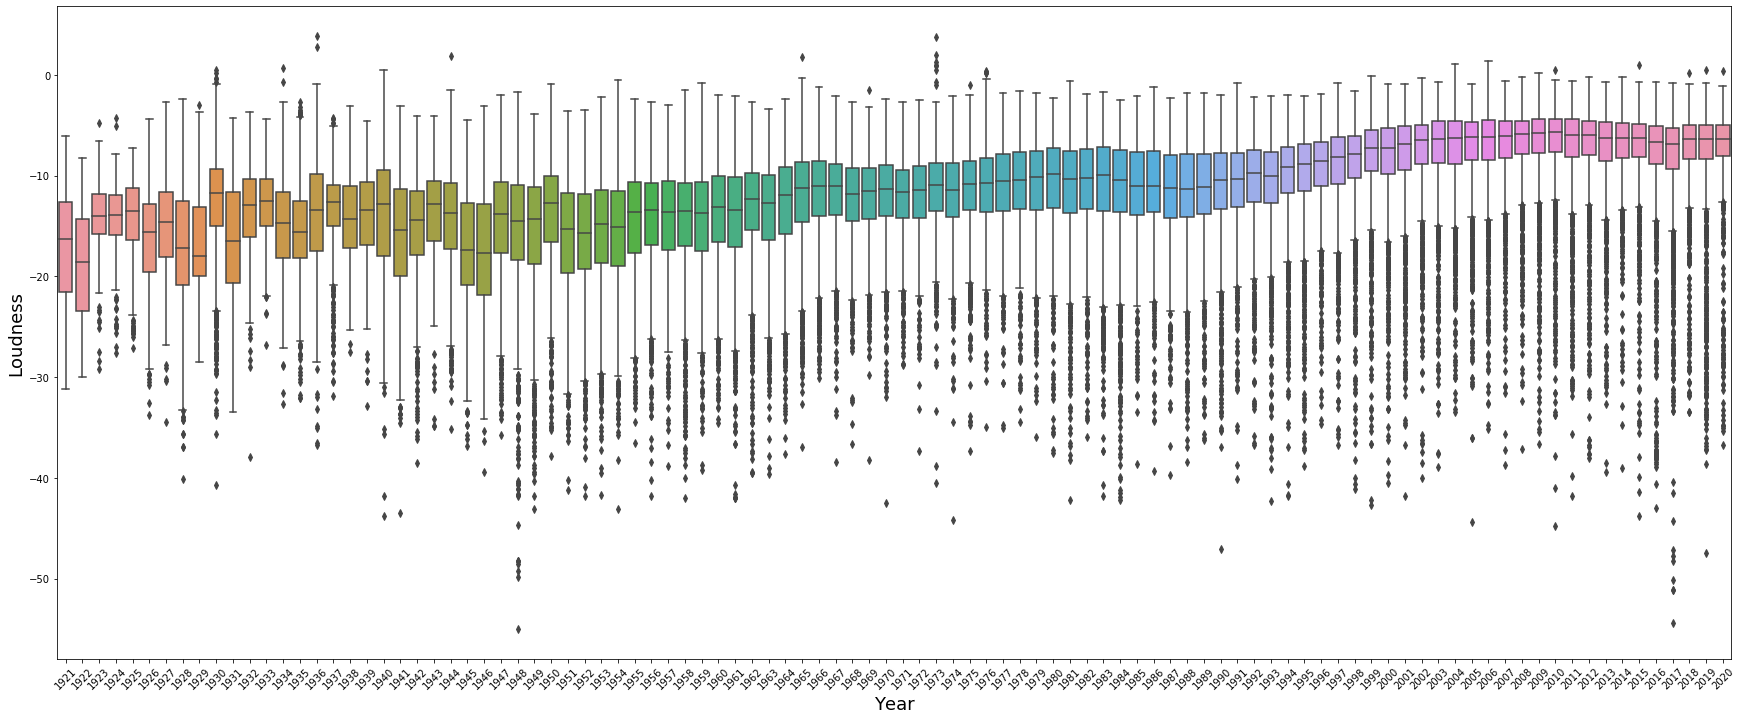

In [28]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x="year", y="loudness", data=total_data_clean)
plt.xlabel("Year", size=18)
plt.ylabel("Loudness", size=18);

Not much of a difference here, let's move on!

## 'duration-ms'
This refers to the length of the song in milliseconds.

Text(0, 0.5, 'Duration (ms)')

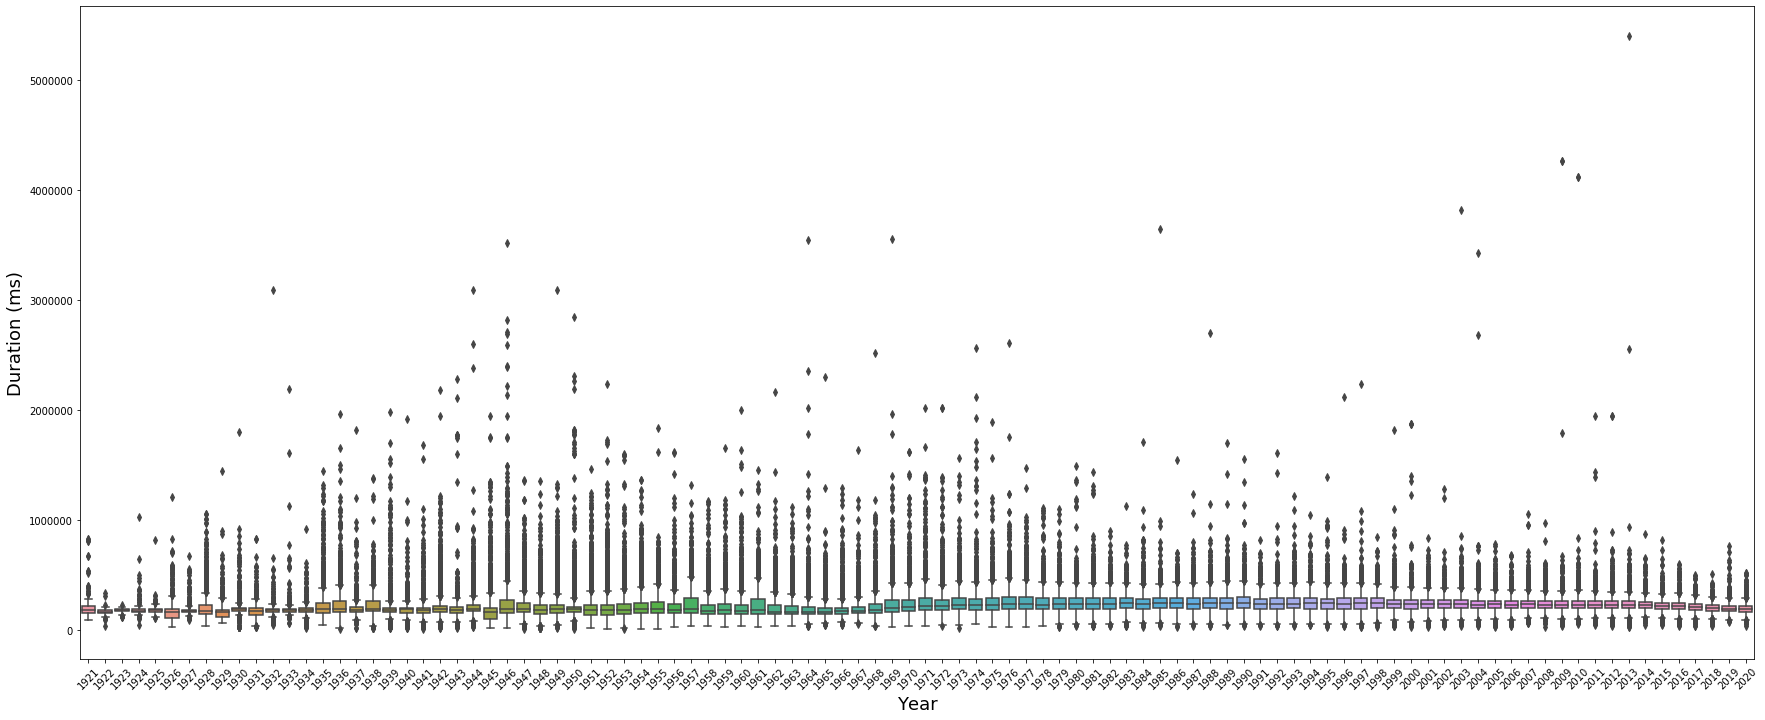

In [29]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x="year", y="duration_ms", data=total_data_clean)
plt.xlabel("Year", size=18)
plt.ylabel("Duration (ms)", size=18)

Some outliers here are seriously squishing our chart. What is the longest duration song?

In [30]:
#longest duration song:
total_data_clean[total_data_clean.duration_ms == total_data_clean.duration_ms.max()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
7411,0.111,['Sound Dreamer'],0.0,5403500,0.000099,0,7foc25ig7dibxvULPU2kBG,0.392,2,0.137,-21.669,1,Brown Noise - 90 Minutes,50,2013-06-05,0.0,0.0,0.0,2013


After looking up 'Brown Noise - 90 Minutes' by 'Sound Dreamer, I've realized this artist has made somewhere around $20,000 in royalties (+5M streams @ ~0.004 cents/stream) from a track that is literally just white noise (I'm assuming to help people sleep as background noise). Genius.

Now, let's try removing these outliers by only keeping values of duration_ms that are within 3 standard deviations of the mean and re-plotting. 

In [31]:
from scipy import stats
#assigning data withing 3 standard deviations of the mean
total_data_clean2 = total_data_clean[(np.abs(stats.zscore(total_data_clean.duration_ms)) < 3)]

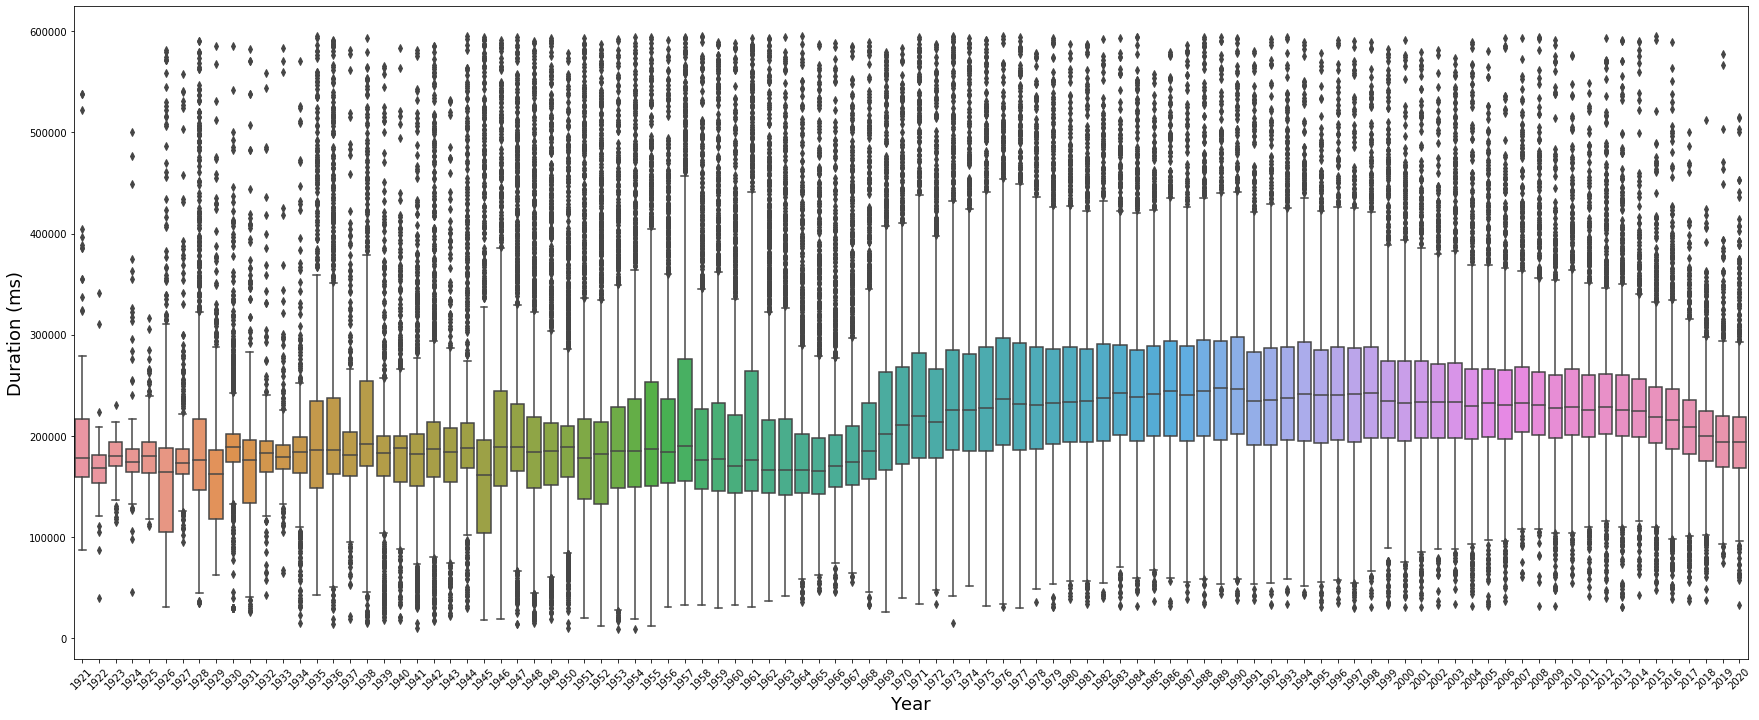

In [32]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x="year", y="duration_ms", data=total_data_clean2)
plt.xlabel("Year", size=18)
plt.ylabel("Duration (ms)", size=18);

Even with durations greater than 3 standard deviations from the median cut out, there are still a ton of outliers. This gives us the impression that duration is not the most significant measurement over time. The absolute median values however (as we also saw earlier with our scatter plots) seem to tell us that recently, the duration of songs is decreasing.

## 'instrumentalness'
'intrumentalness' "predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this: Instrumentalness distribution".

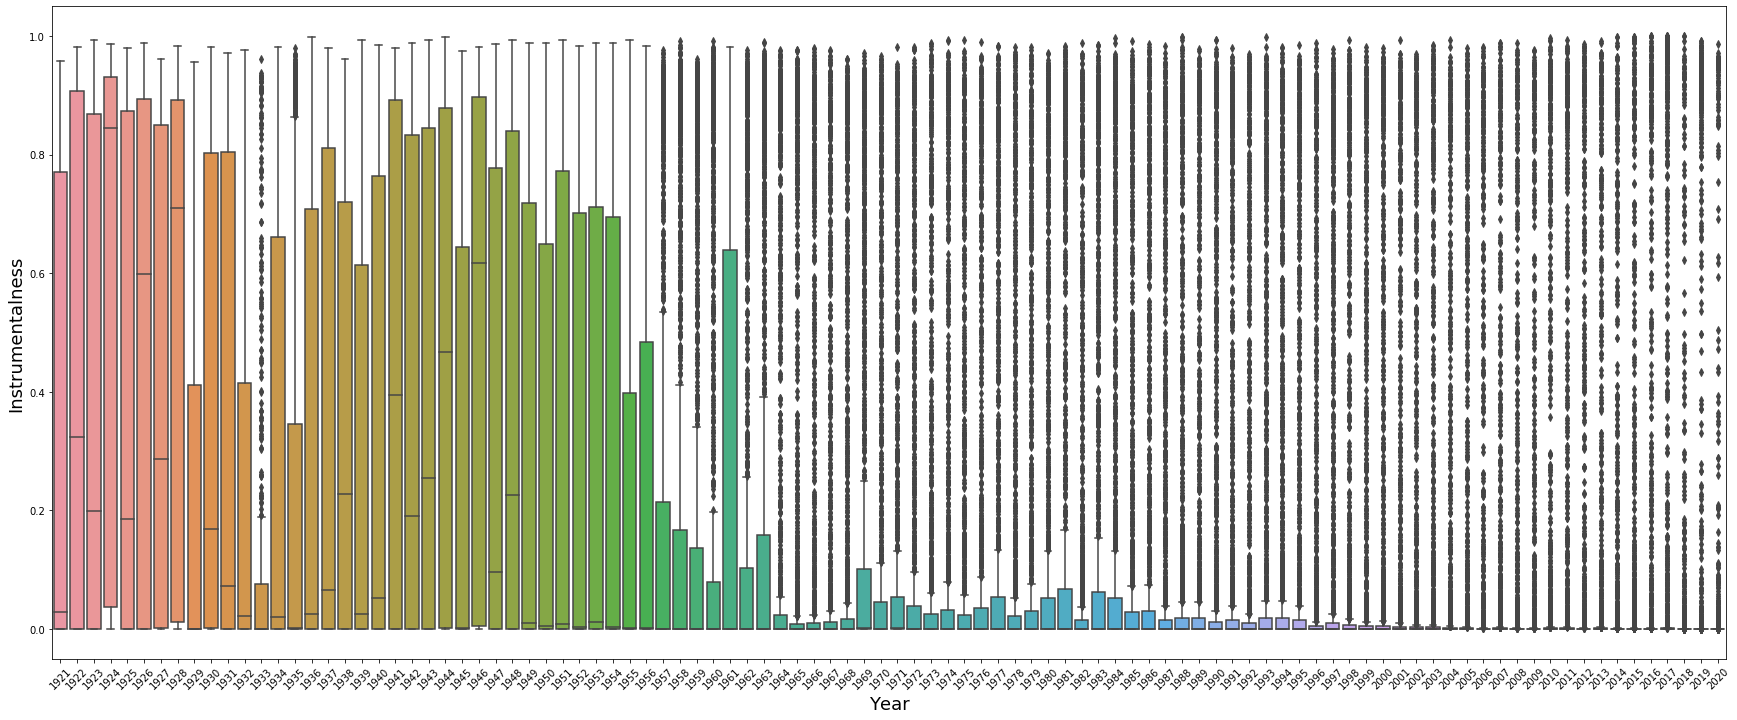

In [33]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x="year", y="instrumentalness", data=total_data_clean2)
plt.xlabel("Year", size=18)
plt.ylabel("Instrumentalness", size=18);

The early 20th century saw an abundance of instrumental songs compared to recent times. The instrumentalnesss for this dataset for recent years (since the 60s), is extremely condensed in the vocal end of the scale, with only outliers being instrumental. This is a bit surprising to me, as a decent amount of my favorite music (recently released) does not have vocals.

## 'liveness'
"Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live."

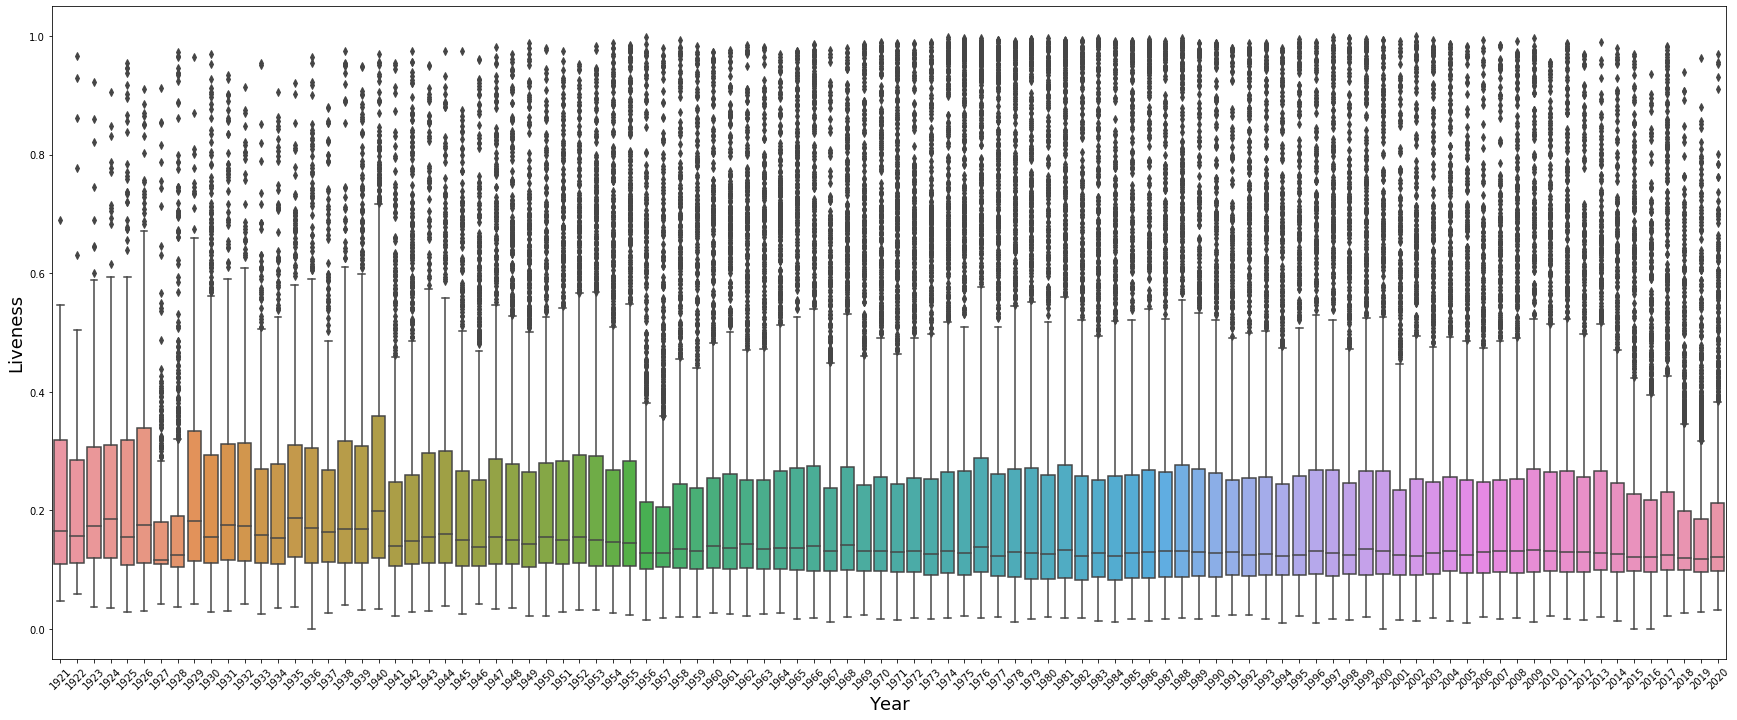

In [34]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x="year", y="liveness", data=total_data_clean2)
plt.xlabel("Year", size=18)
plt.ylabel("Liveness", size=18);

The values over time seem quite evenly distributed, with a very slight decrease in median liveness over time. As the confidence value for liveness is stated at 0.8, we can say that most songs throughout time are note recorded live.

## 'speechiness'
"Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. The distribution of values for this feature look like this: Speechiness distribution."*

Understanding the Spotify-written definitions for each feature is important as we can see here. This let's us know that there are tracks which are completely spoken word (values above 0.66), essentially not music. In other words, more cleaning. Let's remove all songs where the speechiness value is above that threshold.

In [35]:
total_data_clean3 = total_data_clean2[total_data_clean2.speechiness < 0.66]

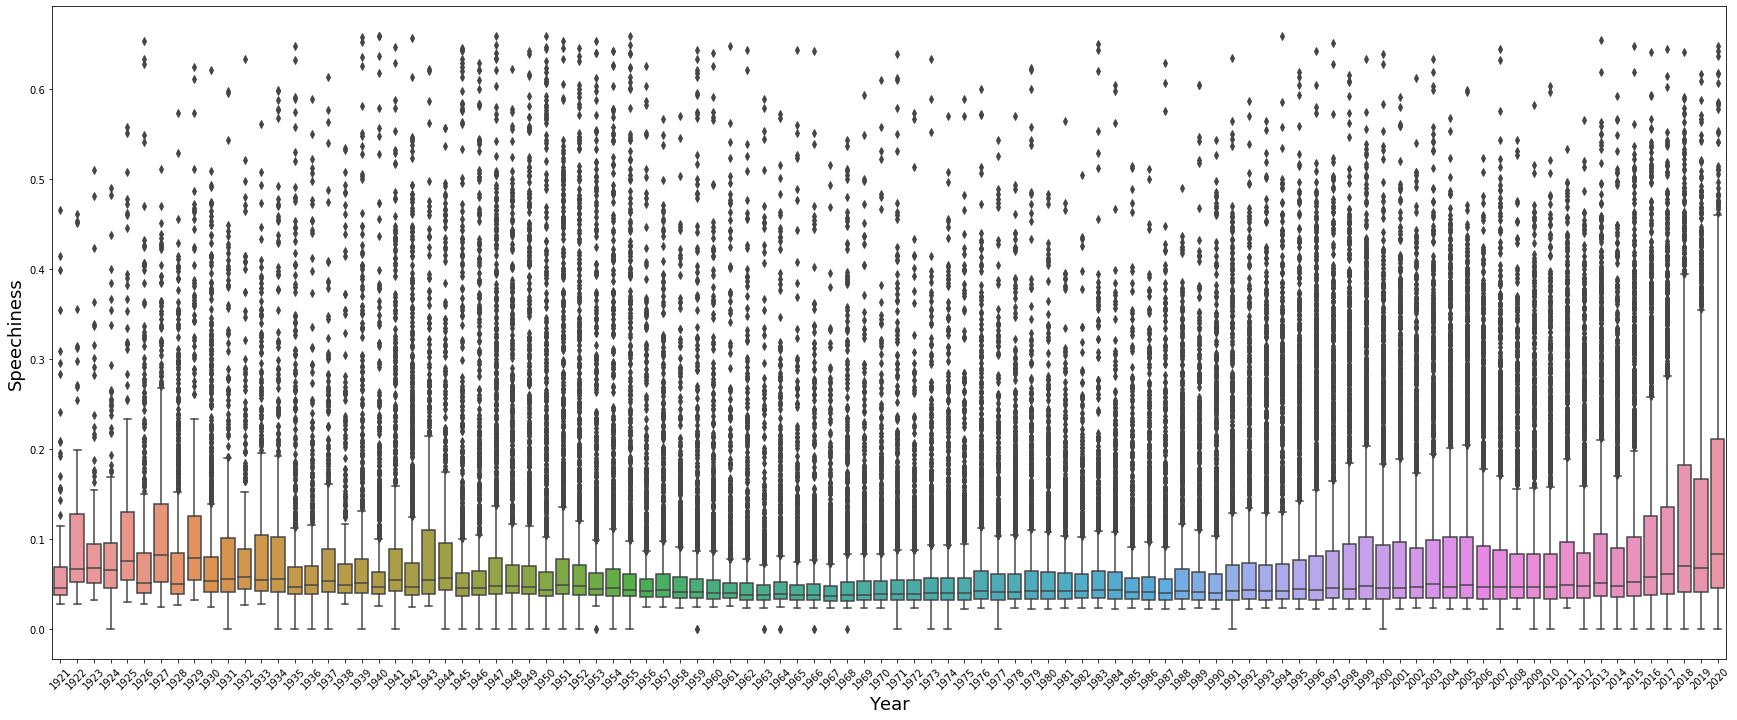

In [36]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x="year", y="speechiness", data=total_data_clean3)
plt.xlabel("Year", size=18)
plt.ylabel("Speechiness", size=18);

Even after removal of the top 1/3 of the data the values are quite compressed. We might want to consider re-normalizing this cut off data back to 1 for similar scaling. (ML models usually perform better and also quicker when the data is normalized)

Let's quickly explore what a high value up to 0.66 sounds like:

In [37]:
total_data_clean3[total_data_clean3.speechiness == total_data_clean3.speechiness.max()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
24466,0.8850,['Charlie Chaplin'],0.721,222867,0.383,0,3GFxJFX4CcJ7SiQS0D7NCT,0.0000,2,0.503,-8.429,1,"Final Speech (From ""El Gran Dictador"")",1,1940,0.659,124.404,0.629,1940
68060,0.0749,['Insane Clown Posse'],0.838,248613,0.747,1,26qVURgWORB9IqDzLlIvOt,0.0000,6,0.277,-6.608,1,Chicken Huntin',30,1994-01-01,0.659,160.922,0.591,1994
71537,0.9860,['Asha Bhosle'],0.699,169407,0.285,0,0PFjsxfBhZPasIQ7q55ozk,0.0199,7,0.110,-8.843,0,Haseen Raat,0,1955-12-31,0.659,170.200,0.917,1955
79943,0.8850,['Charlie Chaplin'],0.721,222867,0.383,0,5HjcDXSfMbBmG4x04wELjK,0.0000,2,0.503,-8.429,1,"Final Speech (From ""The Great Dictator"")",27,1940,0.659,124.404,0.629,1940
79944,0.8850,['Charlie Chaplin'],0.721,222867,0.383,0,3sGNjqsVvPslYzC9ngl64g,0.0000,2,0.503,-8.429,1,"Final Speech - From ""The Great Dictator""",21,1940,0.659,124.404,0.629,1940
137254,0.6810,['Эрнест Хемингуэй'],0.737,98203,0.297,1,0HrpG9wgAJb6qYvW55FI63,0.0000,0,0.275,-18.425,1,"Часть 75.4 & Часть 76.1 - За рекой, в тени дер...",0,1950,0.659,126.207,0.522,1950
162617,0.9950,['Nadira'],0.814,162199,0.236,0,4VU5AaCNGR8Wi4HlYhCpVR,0.4550,7,0.116,-10.118,0,Barhe Chalo Barhe Chalo,0,1947-01-01,0.659,117.036,0.804,1947


## 'tempo'

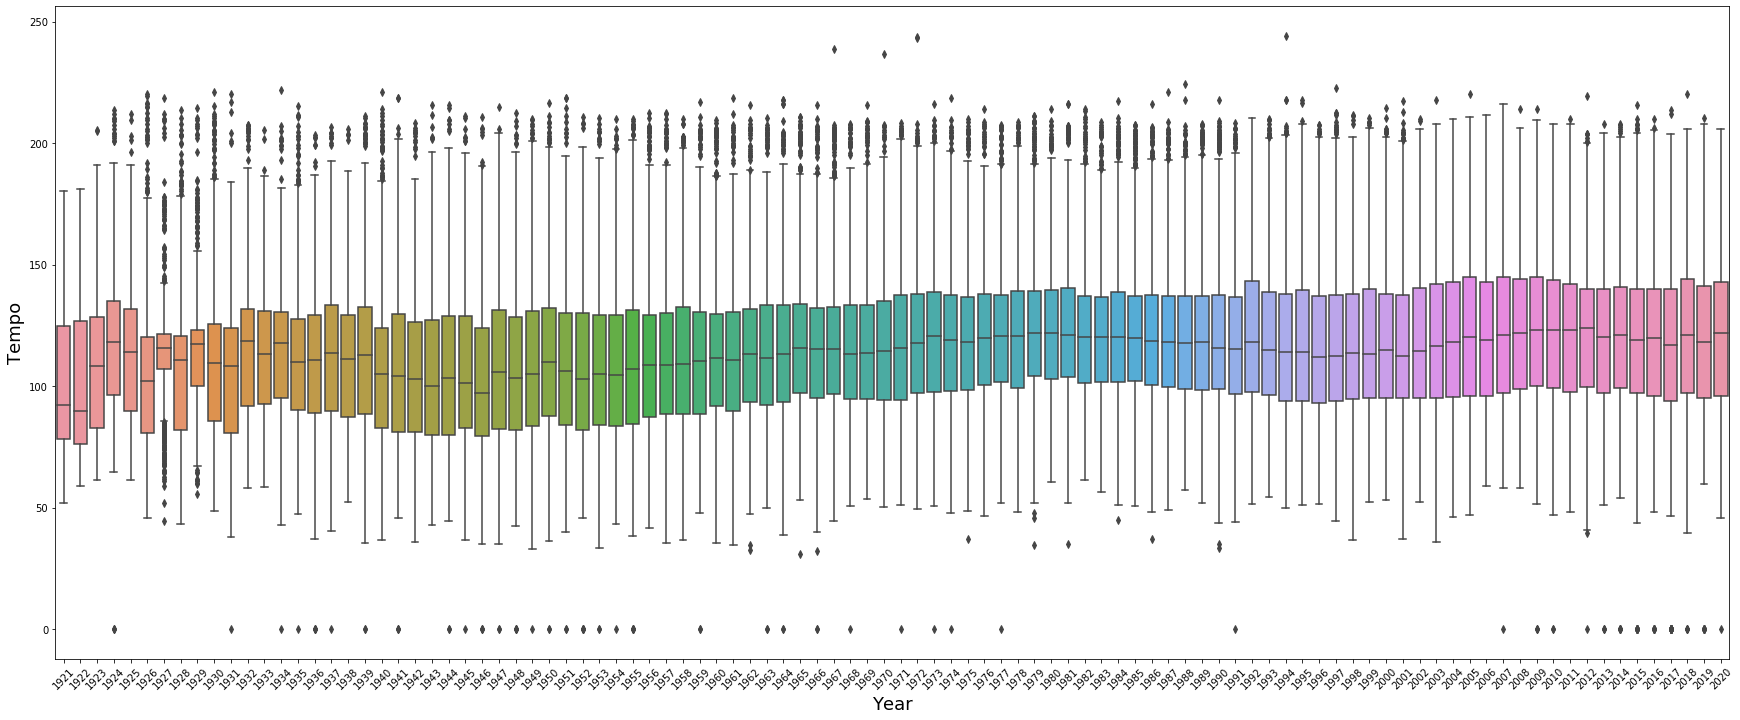

In [38]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x="year", y="tempo", data=total_data_clean3)
plt.xlabel("Year", size=18)
plt.ylabel("Tempo", size=18)
plt.savefig('Images/tempo_boxplot.png');

What is the fastest song in this dataset?

In [39]:
total_data_clean3[total_data_clean3.tempo == total_data_clean3.tempo.max()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
29611,0.561,['Bill Withers'],0.538,276733,0.389,0,3BaFRtmUWO1Z3gzc9zYRh2,0.357,11,0.0864,-13.558,0,I Don't Want You On My Mind,40,1994-08-09,0.0486,244.091,0.79,1994


There seem to be some very slow outliers, with tempos of 0. Spoken word possibly? Let's see what the minimum tempo tracks are.

In [40]:
total_data_clean3[total_data_clean3.tempo == total_data_clean3.tempo.min()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
1269,0.976000,"['Richard Wagner', 'Keilberth', 'Varnay', 'Lor...",0.0,212667,0.085400,0,19Ttq3sjIl5pW9wT7ZFfmY,0.000105,7,0.343,-21.505,1,"Götterdämmerung : Act 1 : Willkommen, Gast, In...",0,1952,0.0,0.0,0.0,1952
2721,0.099500,['Frank Sinatra'],0.0,60280,0.906000,0,0P7TUyrm6OfIDJJKcidvnu,0.000018,1,0.366,-6.227,1,My Kind Of Town (Reprise) - Live At The Sands ...,22,1966-07,0.0,0.0,0.0,1966
3387,0.756000,['Waylon Jennings'],0.0,14708,0.048400,0,2mex2o4uA69pMcLjMtyyGb,0.000144,4,0.166,-18.198,1,Ride Me Down Easy,29,1973-07-01,0.0,0.0,0.0,1973
7792,0.145000,['Fan Sounds'],0.0,500167,0.000020,0,4xu38KnbRHbRHRwdg4KFul,0.213000,6,0.114,-25.556,1,Box Fan Long Loop For Sleep,60,2017-01-01,0.0,0.0,0.0,2017
8834,0.976000,"['Giacomo Puccini', 'Arturo Toscanini']",0.0,165520,0.210000,0,5rPQIsOgxpUe48ffvw7OJ0,0.000261,1,0.869,-17.348,1,La Bohème: Act I: Si può? - Chi è là? - Benoit!,4,1946,0.0,0.0,0.0,1946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162730,0.951000,"['Igor Stravinsky', 'Columbia Symphony Orchest...",0.0,63373,0.126000,0,3l4zPozgfoLhF6JnUfWDMf,0.689000,8,0.608,-16.260,1,L'Oiseau de feu: Dialogue de Kachtchei avec Iv...,0,1948,0.0,0.0,0.0,1948
164201,0.862000,['Bill Cosby'],0.0,215280,0.770000,0,2W0KFIFBFcLBlklD7ugiw6,0.000002,9,0.694,-15.316,0,Noah: Right!,16,1963,0.0,0.0,0.0,1963
169522,0.913000,['Granular'],0.0,205161,0.000164,0,2e6fCxto7NzsnujvliBtEk,0.910000,10,0.155,-31.221,0,White Noise - 700 hz,64,2017-10-14,0.0,0.0,0.0,2017
169743,0.000013,['Naturaleza FX'],0.0,150879,0.000020,0,4UFlnhDTGyKvlhOQziDHkG,0.208000,1,0.311,-16.873,1,Colors of the Rain,68,2019-10-10,0.0,0.0,0.0,2019


A few things noticed here. This track by Bill Cosby, 'Noah: Right!' is actually spoken word ('speechiness' for this track is also wrong, as it is 0). However some of these other songs with a tempo of 0 are actually music, but just live recording. Some are also white noise (for sleeping). So clearly tempo-less songs are usually mis-labeled.

As there is also small amount of these 0 values, compared to the nearly 160,000 tracks in the dataset, we should just drop these all.

In [41]:
total_data_clean4 = total_data_clean3[total_data_clean3.tempo != 0.0]

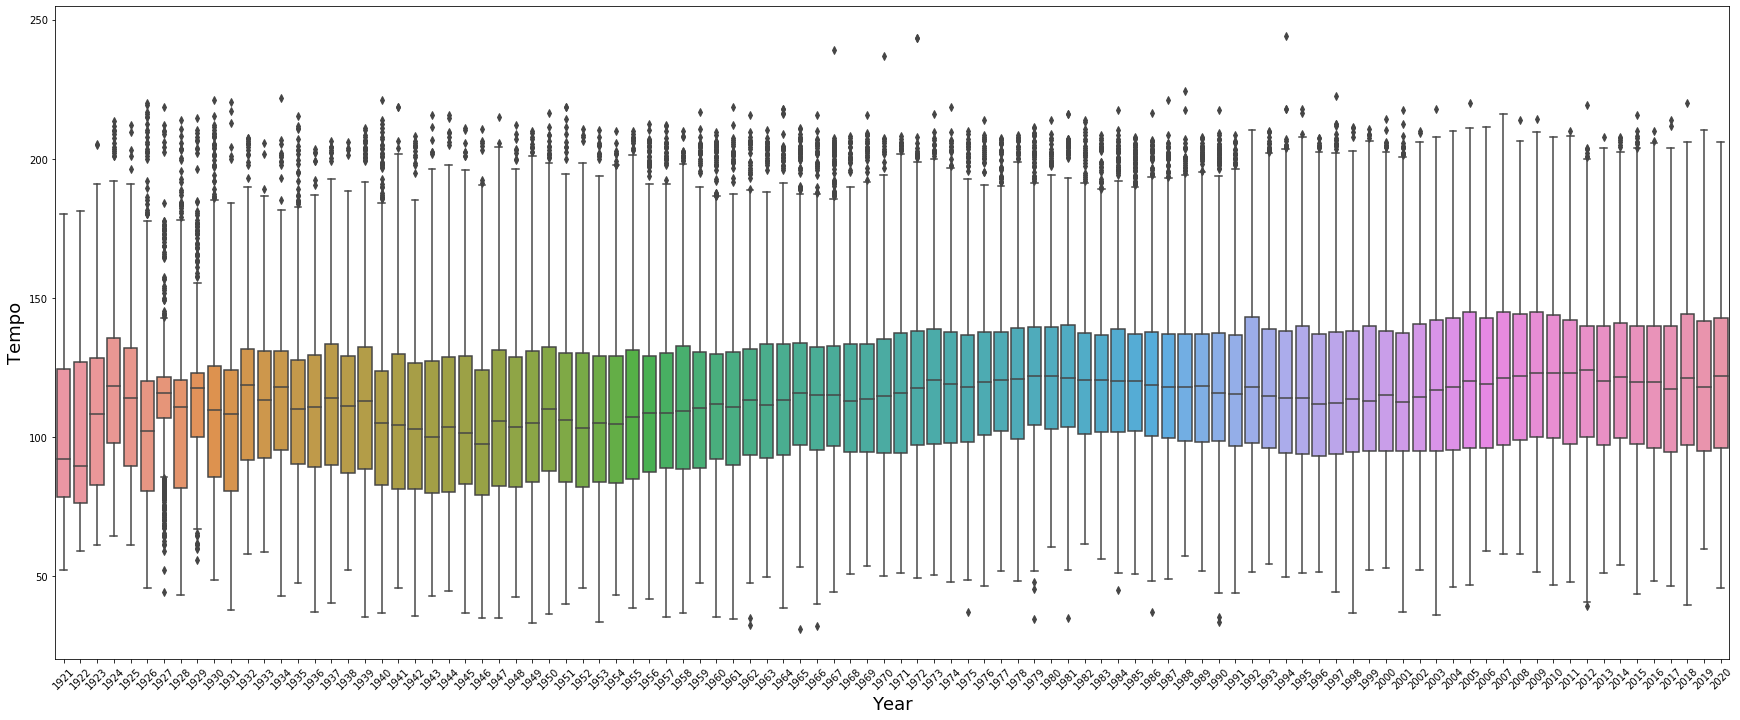

In [42]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x="year", y="tempo", data=total_data_clean4)
plt.xlabel("Year", size=18)
plt.ylabel("Tempo", size=18);


## 'valence'
Valence is a normalized measure of musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). 


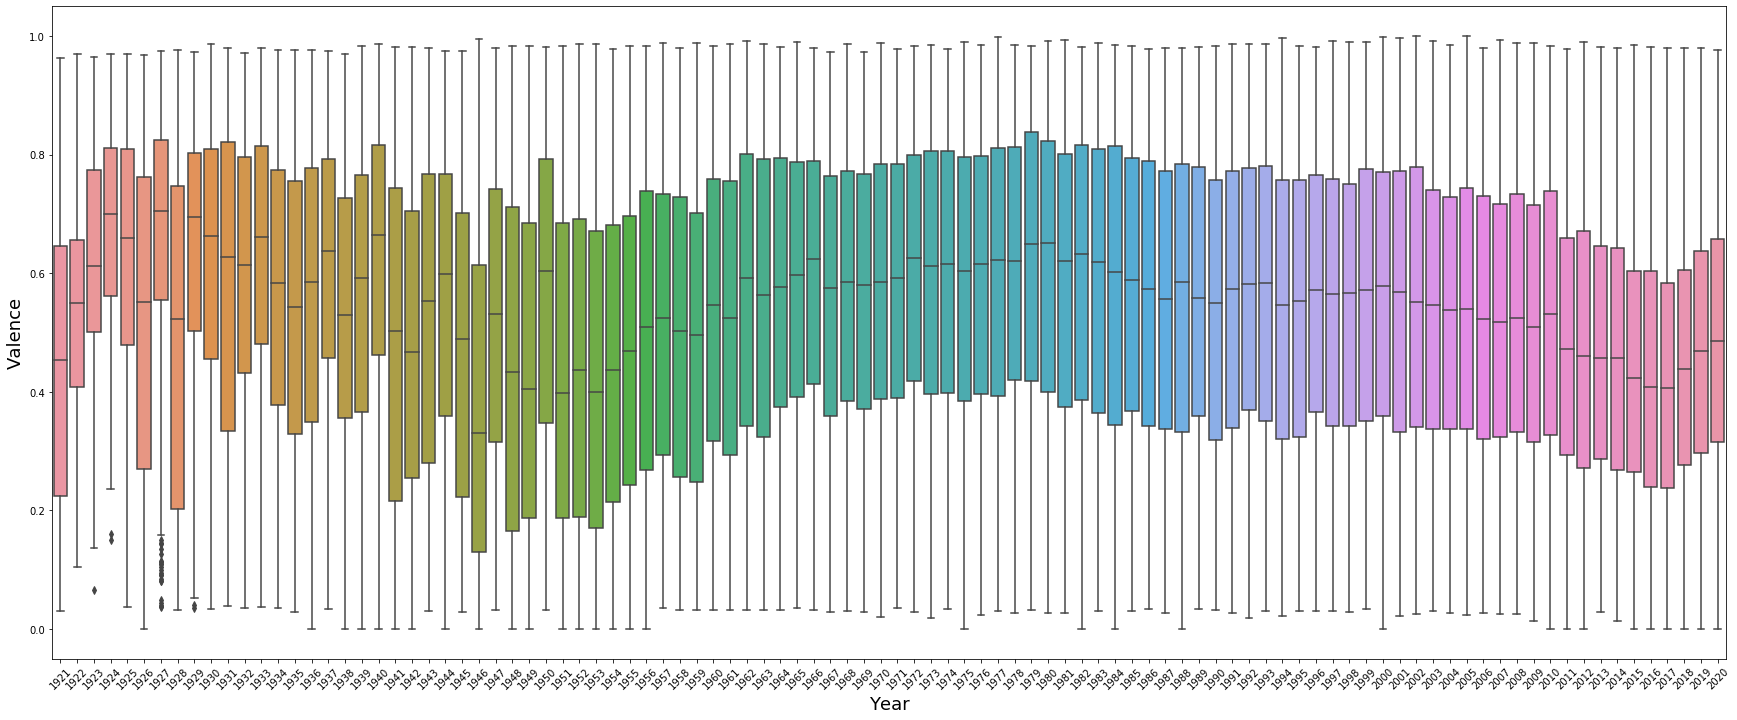

In [43]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x="year", y="valence", data=total_data_clean4)
plt.xlabel("Year", size=18)
plt.ylabel("Valence", size=18);

The valence of songs seems to be a bit of a wave, with musical 'positiveness' going down in the 40s (World War II, possibly), and rebounding after 1945 (war ends). The late 70's saw a peak and continued back to decline until 2017, where valence/positivity is pushing back up again.

## 'popularity'
Popularity is a value that takes into account the amount of streams within a window, in addition to overall stream count on Spotify.

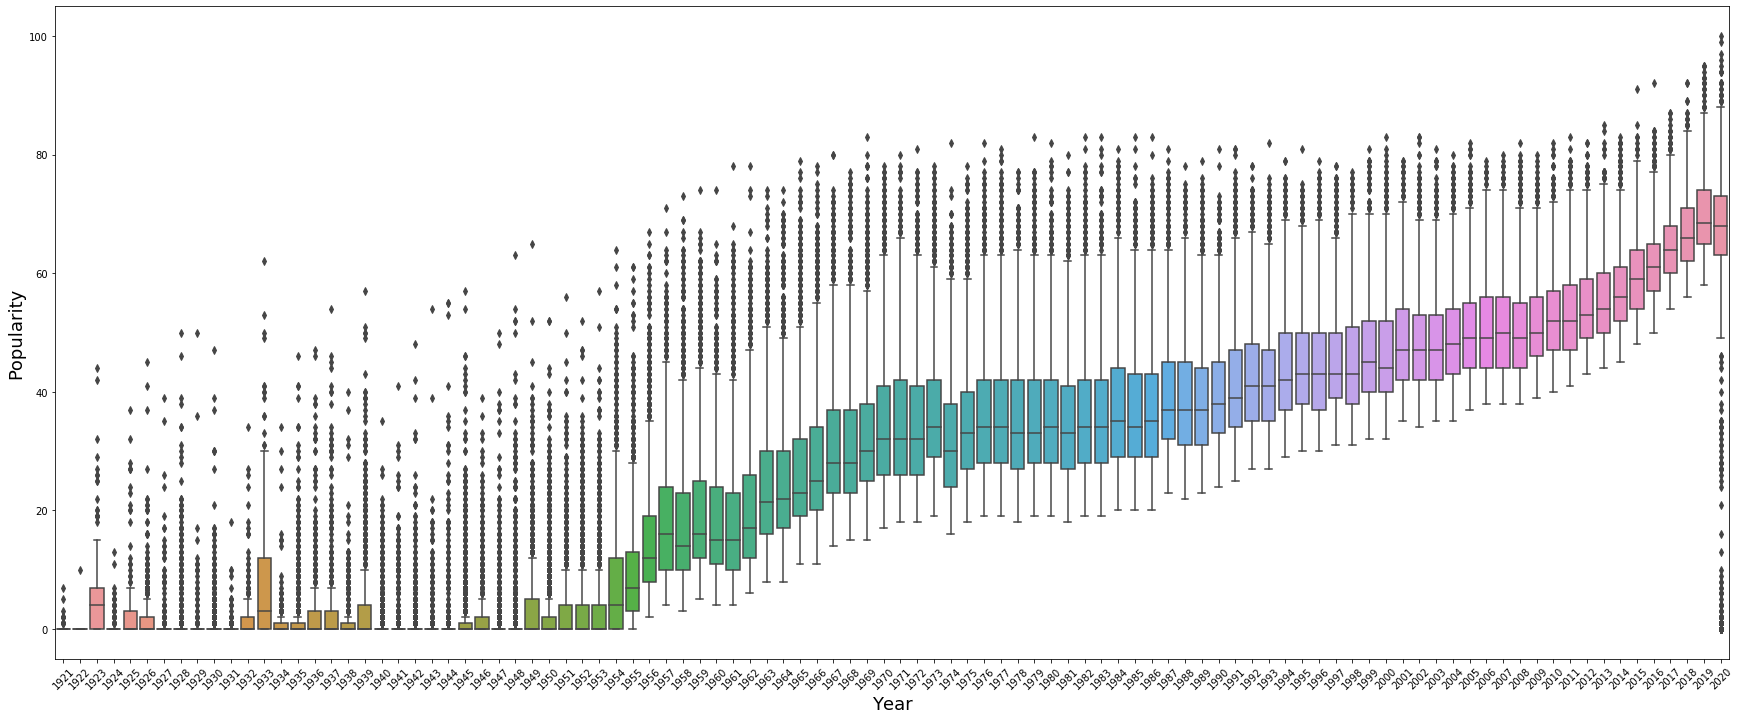

In [44]:
plt.figure(figsize=(30,12))
plt.xticks(rotation=45)
sns.boxplot(x="year", y="popularity", data=total_data_clean4)
plt.xlabel("Year", size=18)
plt.ylabel("Popularity", size=18);

Popularity grows steadily over time. I believe this is due to the users signing up for Spotify increasing over the years. Almost no one is listening to music from 1921, and most recent music is obviously the most popular. Interestingly however, there are no lower-outliers until 2020. This could be very new songs which just haven't been on Spotify long enough to generate the usual stream count.

What is the most popular song in this dataset?

In [45]:
total_data_clean4[total_data_clean4.popularity == total_data_clean4.popularity.max()]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
87942,0.00146,['The Weeknd'],0.514,200040,0.73,0,0VjIjW4GlUZAMYd2vXMi3b,0.000095,1,0.0897,-5.934,1,Blinding Lights,100,2020-03-20,0.0598,171.005,0.334,2020


## 'key' 
Musical key of the song. As this is clearly a categorical feature, we will use a different visualization.

Let's try another visual using a violin plot to show density of values.

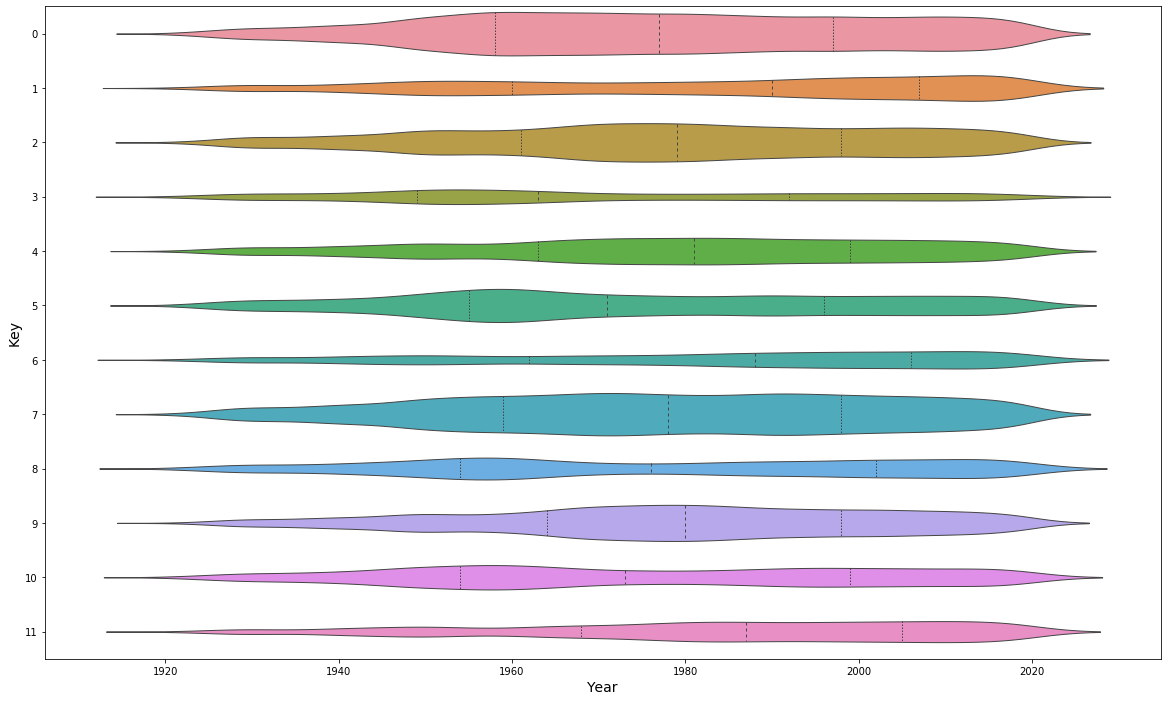

In [46]:
plt.figure(figsize=(20, 12))
sns.violinplot(data=total_data_clean4, x="year", y="key",
               split=True, inner="quart", linewidth=1, orient="h", scale='count')
plt.xlabel("Year", size=14)
plt.ylabel("Key", size=14)

plt.savefig('Images/key_violinplot.png');

Utilizing the 'scale' parameter, we set it to 'count' so that the width of each violin depends on overall count of each key. We are now more easily able to recognize that some keys are used more than others (specifically 0, and 7).

Let's use a lambda function to get the key with the max value_count per year (in other words, the mode, or most common key per year).

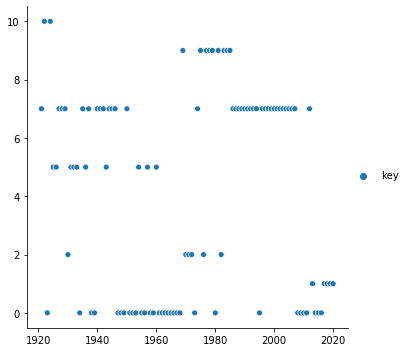

In [47]:
yrly_key_mode = total_data_clean4.groupby('year').apply(lambda x: x['key'].value_counts().idxmax()).to_frame(name="key")
# yrly_key_mode.rename(columns={"0": "key"}, inplace=True)
sns.relplot(data=yrly_key_mode);

This chart is a slightly different compared to our yearly data scatterplot from 2.0.3, which uses mean averaging. 

## 'mode'
'mode' is a boolean variable, referring to the musical modality (kind of like 'key') of the track. Either Major (1) or minor (0). 

We can group the dataframe by mode per year and get the median value. Anything over .5 would indicate the majority of track that year are Major, otherwise the majority is minor.

In [48]:
total_data_clean4.rename(columns={"mode": "modality"}, inplace=True)

/Users/orin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


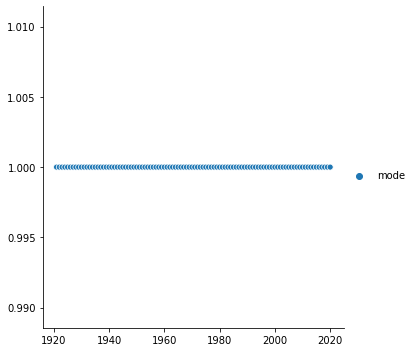

In [49]:
yrly_modality_mode = total_data_clean4.groupby('year').apply(lambda x: x['modality'].value_counts().idxmax()).to_frame(name='mode')
sns.relplot(data=yrly_modality_mode);

The major key is most used, always! Our time series would most definitely predict future values to also be 1, so we can effectively leave this out from our time series predictive modeling. 

'Explicit' is another feature whose values are very similar to 'mode', where most songs are explicit. We can tell that the median is 0, for nonexplicit just judging by the 5-point statistics.

# Creating Our Own yearly_data df
Now we will create a new data_by_year dataframe, with median values (and mode for key) instead of mean values as these will more accurately represent the average of the data with little skew. We will use this new dataframe for our time series modeling.

In [59]:
median_yrly_acousticness = total_data_clean4.groupby('year', as_index=False)['acousticness'].median()
median_yrly_danceability = total_data_clean4.groupby('year', as_index=False)['danceability'].median()
median_yrly_duration = total_data_clean4.groupby('year', as_index=False)['duration_ms'].median()
median_yrly_energy = total_data_clean4.groupby('year', as_index=False)['energy'].median()
median_yrly_loudness = total_data_clean4.groupby('year', as_index=False)['loudness'].median()
median_yrly_instrumentalness = total_data_clean4.groupby('year', as_index=False)['instrumentalness'].median()
median_yrly_liveness = total_data_clean4.groupby('year', as_index=False)['liveness'].median()
median_yrly_speechiness = total_data_clean4.groupby('year', as_index=False)['speechiness'].median()
median_yrly_tempo = total_data_clean4.groupby('year', as_index=False)['tempo'].median()
median_yrly_valence = total_data_clean4.groupby('year', as_index=False)['valence'].median()
median_yrly_popularity = total_data_clean4.groupby('year', as_index=False)['popularity'].median()


all_dfs = [median_yrly_acousticness,
               median_yrly_danceability,
               median_yrly_duration,
               median_yrly_energy,
               median_yrly_loudness,
               median_yrly_instrumentalness,
               median_yrly_liveness,
               median_yrly_speechiness,
               median_yrly_tempo,
               median_yrly_valence,
               median_yrly_popularity,
               yrly_key_mode]

yearly_merged = reduce(lambda left,right: pd.merge(left,right,on=['year'],
                                            how='outer'), all_dfs)
yearly_merged

,year,acousticness,danceability,duration_ms,energy,loudness,instrumentalness,liveness,speechiness,tempo,valence,popularity,key
0,1921,0.9900,0.4115,178040.0,0.2205,-16.0000,0.028700,0.1655,0.04595,92.1440,0.4545,0.0,7
1,1922,0.9940,0.4895,168053.5,0.2010,-18.6210,0.324500,0.1575,0.06665,89.6905,0.5490,0.0,10
2,1923,0.9920,0.5765,180347.0,0.2465,-13.9605,0.218000,0.1725,0.06775,108.3805,0.6115,4.0,0
3,1924,0.9940,0.5650,173786.5,0.3250,-13.8420,0.844000,0.1855,0.06550,118.3225,0.6995,0.0,10
4,1925,0.9890,0.5750,179360.0,0.2390,-13.5520,0.174000,0.1550,0.07560,114.0380,0.6590,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2016,0.1530,0.6130,215440.0,0.6180,-6.6090,0.000002,0.1210,0.05760,119.9060,0.4090,61.0,0
96,2017,0.1720,0.6400,209132.0,0.6085,-6.8080,0.000002,0.1250,0.06240,117.2825,0.4065,64.0,1
97,2018,0.1710,0.6870,199560.0,0.6030,-6.3720,0.000000,0.1200,0.06975,121.1435,0.4390,66.0,1
98,2019,0.1785,0.6790,194044.0,0.6200,-6.3295,0.000000,0.1180,0.06840,118.0425,0.4690,68.5,1


Perfect. We now have a new playlist of the median value of each feature, for every year in the dataset. Let's now save this new dataframe to a .csv to import into our modeling notebook!

In [52]:
# yearly_merged.to_csv(r'Datasets/yearly_merged.csv', index = False);

In [53]:
cleaned_all_tracks = total_data_clean4
# cleaned_all_tracks.to_csv(r'Datasets/cleaned_all_tracks.csv', index = False);

# Sharing Interactive Notebook to Jovian.ml:

In [54]:
 # Install the jovian Python library
!pip install jovian --upgrade -q

^C
ERROR: Operation cancelled by user


In [55]:
import jovian

<IPython.core.display.Javascript object>

In [60]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "oac0de/1-preprocessing-eda" on https://jovian.ai/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/oac0de/1-preprocessing-eda


'https://jovian.ai/oac0de/1-preprocessing-eda'